# Anatomically inspired Digital Twins figures


In [3]:
import os
import matplotlib.pyplot as plt
from demo.figures.fig_params import MY_STYLE

In [ ]:
savepath = os.path.join('save', 'figures', 'neurips')
if not os.path.exists(savepath):
    os.makedirs(savepath)

# Figure 1

In [ ]:
from demo.figures.fig_functions import plot_hierarchy, plot_dotplot_from_dict

In [4]:
MY_STYLE.figsize_single = (2.5, 2.)

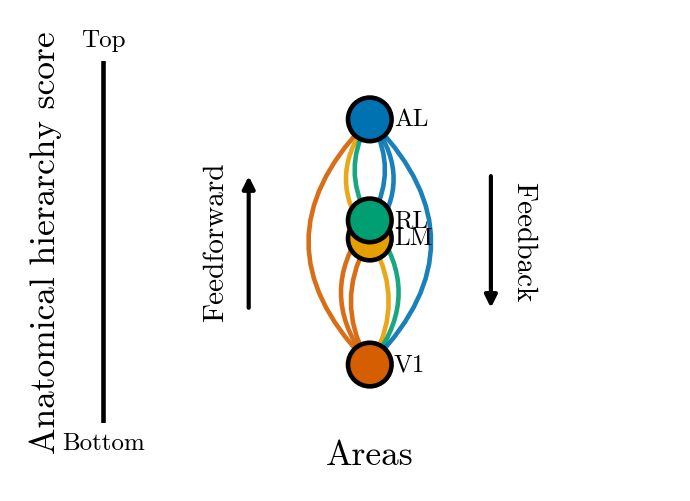

In [5]:
plot_name = 'Fig1B_hierarchy.svg'
plot_hierarchy(savepath=None)#os.path.join(savepath, plot_name))

Slope: 349.63894645541836, Intercept: 710.4368578056176, R-squared: 0.8759754576634895, P-value: 0.06406439448886792, Std Err: 93.02777897028253


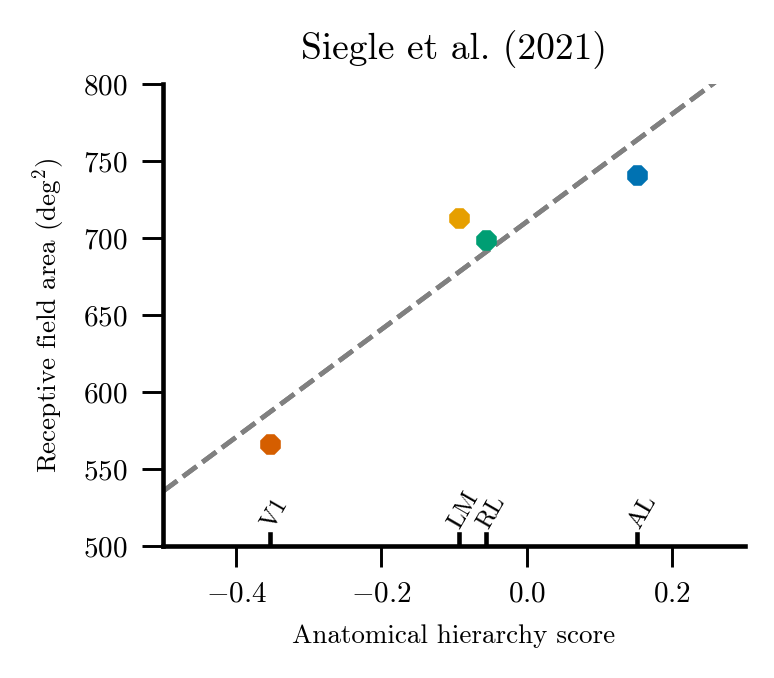

In [6]:
rf_data = {
    'V1': (-0.35383244206773623, 566.2983425414365),
    'LM': (-0.0935828877005348, 712.8913443830571),
    'RL': (-0.05614973262032086, 698.8950276243094),
    'AL': (0.1524064171122994, 740.8839779005525)
}

ylabel = r"Receptive field area (deg$^2$)"
xlim=(-0.5, 0.3)
plotname = 'Fig1B_rf.svg'
plotname = os.path.join(savepath, plotname)
plot_dotplot_from_dict(
    rf_data, 
    ylabel, 
    title="Siegle et al. (2021)", 
    xlabel="Anatomical hierarchy score", 
    ylim=(500, 800), 
    xlim=xlim,
    use_x=True,
    save_path=None#plotname
)

Slope: 0.5650431502438127, Intercept: 0.8171049467905666, R-squared: 0.867296634890842, P-value: 0.0687123779997707, Std Err: 0.15628732359634137


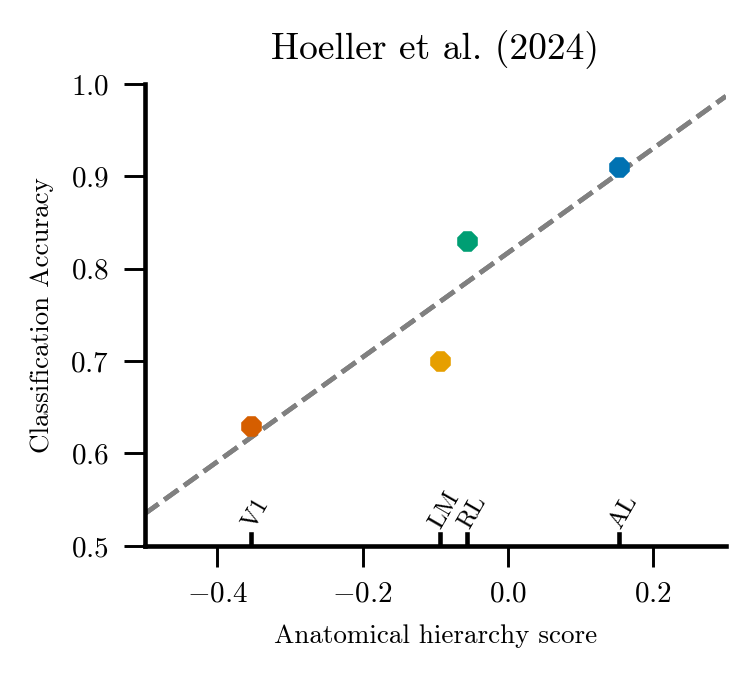

In [7]:
holler_data = {
    'V1': (-0.35383244206773623, 0.63),
    'LM': (-0.0935828877005348, 0.70),
    'RL': (-0.05614973262032086, 0.83),
    'AL': (0.1524064171122994, 0.91),
}

ylabel = "Classification Accuracy"
ylim=(0.5, 1.0)
xlim=(-0.5, 0.3)
plot_name = 'Fig1B_holler.svg'
plot_name = os.path.join(savepath, plot_name)
plot_dotplot_from_dict(
    holler_data, 
    ylabel, 
    title="Hoeller et al. (2024)", 
    xlabel="Anatomical hierarchy score", 
    ylim=ylim, 
    xlim=xlim,
    use_x=True,
    save_path=None#plot_name
)


Slope: 0.09683481096332325, Intercept: 0.12595552027161516, R-squared: 0.28143398580794726, P-value: 0.46949647898628677, Std Err: 0.10941114849367325


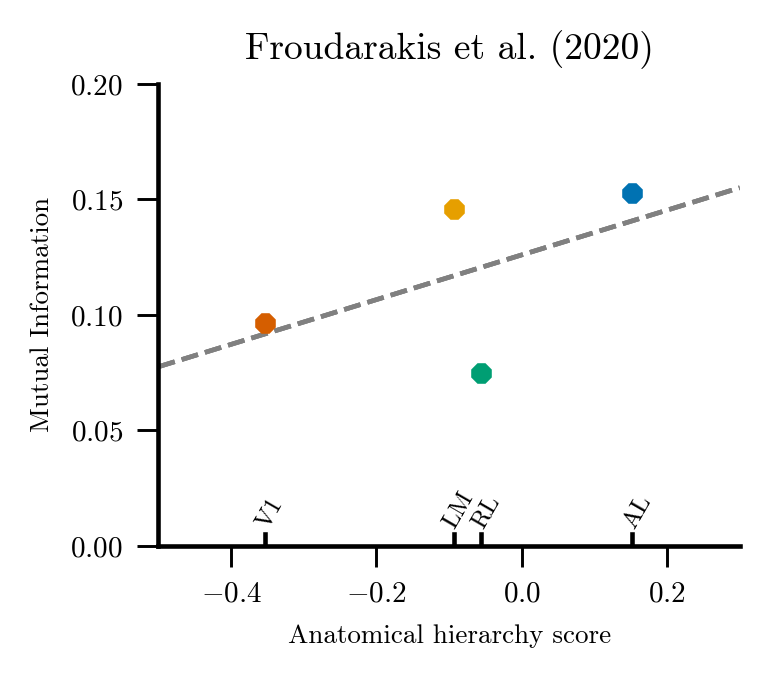

In [8]:
froudarakis_data = {
    'V1': (rf_data['V1'][0], 0.09646528881823),
    'LM': (rf_data['LM'][0], 0.14586751457339692),
    'RL': (rf_data['RL'][0], 0.07475781664016959),
    'AL': (rf_data['AL'][0], 0.15272708002119767),
}

ylabel = 'Mutual Information'
ylim=(0.0, 0.2)
xlim=(-0.5, 0.3)
plot_name = 'Fig1B_froudarakis.svg'
plot_name = os.path.join(savepath, plot_name)
plot_dotplot_from_dict(
    froudarakis_data, 
    ylabel, 
    title="Froudarakis et al. (2020)", 
    xlabel="Anatomical hierarchy score", 
    ylim=ylim, 
    xlim=xlim,
    use_x=True,
    save_path=None#plot_name
)


# Figure 2

## Data

In [9]:
CORRECT_ORDERING_ARF = {'V1': 1, 'RL': 2, 'LM': 3, 'AL': 4}
CORRECT_ORDERING_HOELLER = {'V1': 1, 'RL': 3, 'LM': 2, 'AL': 4}
CORRECT_ORDERING_FROUDARAKIS = {'V1': 2, 'RL': 1, 'LM': 3, 'AL': 4}


In [ ]:
from demo.figures.utils import (
    load_summary, 
    evaluate_models_receptive_fields,
    load_hoeller,
    gather_area_mean_accuracy_hoeller,
    compute_hoeller_kendalls,
    load_froudarakis,
    gather_area_metric_values,
    compute_froudarakis_kendalls,
)


In [11]:
selected_models_fig2 = ['baseline (4 layers)', 'baseline (6 layers)', 'all-layers readout', 'loss normalized']
model_names_arf_fig2 = [
    'benchmark_4_all_seed228', 
    'benchmark_6_all_seed228',
    'all_layer_4_all_seed228',
    'normalized_4_all_seed351',
]

threshold_x = 16
threshold_y = 14

In [12]:
summary_selected_fig2 = load_summary(selected_models_fig2, metric='CCnorm', agg='median')

Loading benchmark_4_all_seed42 summary...
Loading benchmark_4_all_seed228 summary...
Loading benchmark_4_all_seed351 summary...
Loading benchmark_6_all_seed42 summary...
Loading benchmark_6_all_seed228 summary...
Loading benchmark_6_all_seed351 summary...
Loading all_layer_4_all_seed42 summary...
Loading all_layer_4_all_seed228 summary...
Loading all_layer_4_all_seed351 summary...
Loading normalized_4_all_seed42 summary...
Loading normalized_4_all_seed228 summary...
Loading normalized_4_all_seed351 summary...


In [13]:
models_receptive_fields_fig2, labels, means_rf_fig2, sems_rf_fig2 = evaluate_models_receptive_fields(
    model_names_arf_fig2,
    CORRECT_ORDERING_ARF,
    threshold_x=threshold_x,
    threshold_y=threshold_y
)

Processing benchmark_4_all_seed228...
Processing benchmark_6_all_seed228...
Processing all_layer_4_all_seed228...
Processing normalized_4_all_seed351...


In [14]:
hoeller_data_fig2 = load_hoeller(selected_models_fig2)
holler_metrics_fig2 = gather_area_mean_accuracy_hoeller(hoeller_data_fig2)
x_labels, means_hoeller_fig2, sems_hoeller_fig2 = compute_hoeller_kendalls(
    hoeller_data_fig2,
    CORRECT_ORDERING_HOELLER,
    use_sem=False
)

In [15]:
froudarakis_data_fig2 = load_froudarakis(selected_models_fig2)
froud_metrics_fig2 = gather_area_metric_values(
    froudarakis_data_fig2,
    metric='test_mi'
)
x_labels_fig2, means_froud_fig2, sems_froud_fig2 = compute_froudarakis_kendalls(
    froudarakis_data_fig2,
    CORRECT_ORDERING_FROUDARAKIS,
    metric='test_mi',
    use_sem=False
)

## Figure

In [ ]:
from demo.figures.fig_functions import (
    plot_grouped_dotplot_model_area_with_sems,
    plot_median_area_per_model,
    plot_single_neuron_perf_per_model_with_sems,
    dotplot_name_vs_model_tau_with_sem,
    build_summary_figure
)

In [17]:
barplot_fn = lambda ax: plot_grouped_dotplot_model_area_with_sems(
        summary_selected_fig2,
        ylabel='CCNorm',
        area_order=['V1','LM','RL','AL'],
        sems=True,
        title="Model performance per area",
        ylim=(0.48, 0.67),
        ax=ax,                              # ←──── important!
    )

row1_fns = [
    lambda ax: plot_median_area_per_model(
            models_receptive_fields_fig2,
            ax=ax,
            area_order=['V1', 'LM', 'RL', 'AL'],
            regline=True,
            ylim=(150, 1350), xlim=(-0.5, 0.3),
            ylabel="Receptive field area (deg$^2$)",
            xlabel="Anatomical hierarchy score",
            title="Receptive field estimation",
            legend=True, 
            # yticks=[250, 500, 750, 1000, 1250],
        ),
    lambda ax: plot_single_neuron_perf_per_model_with_sems(
        holler_metrics_fig2,
        ylabel='Classification Accuracy',
        ax=ax,
        area_order=['V1','LM','RL','AL'],
        sems=True, regline=True,
        ylim=(0.09,0.3), xlim=(-0.5,0.3),
        xlabel='Anatomical hierarchy score',
        title='Hoeller Task',
        legend=True, loc='upper left',
        # ytick=[0.15,0.20,0.25],
    ),
    lambda ax: plot_single_neuron_perf_per_model_with_sems(
        froud_metrics_fig2,
        ylabel='Mutual Information',
        ax=ax,
        area_order=['V1','LM','RL','AL'],
        sems=True, regline=True,
        ylim=(0.25, 0.5), xlim=(-0.5,0.3),
        # ytick=[0.3,0.35, 0.4,0.45],
        xlabel='Anatomical hierarchy score',
        title='Froudarakis Task',
        legend=True, loc='upper left',
    ),
]

row2_fns   = [
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_fig2, means_rf_fig2, sems_rf_fig2,
            ylabel="Model–data alignment\n(Kendall’s τ rank corr)",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_fig2, means_hoeller_fig2, sems_hoeller_fig2,
            ylabel="",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_fig2, means_froud_fig2, sems_froud_fig2,
            ylabel="",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
    ]

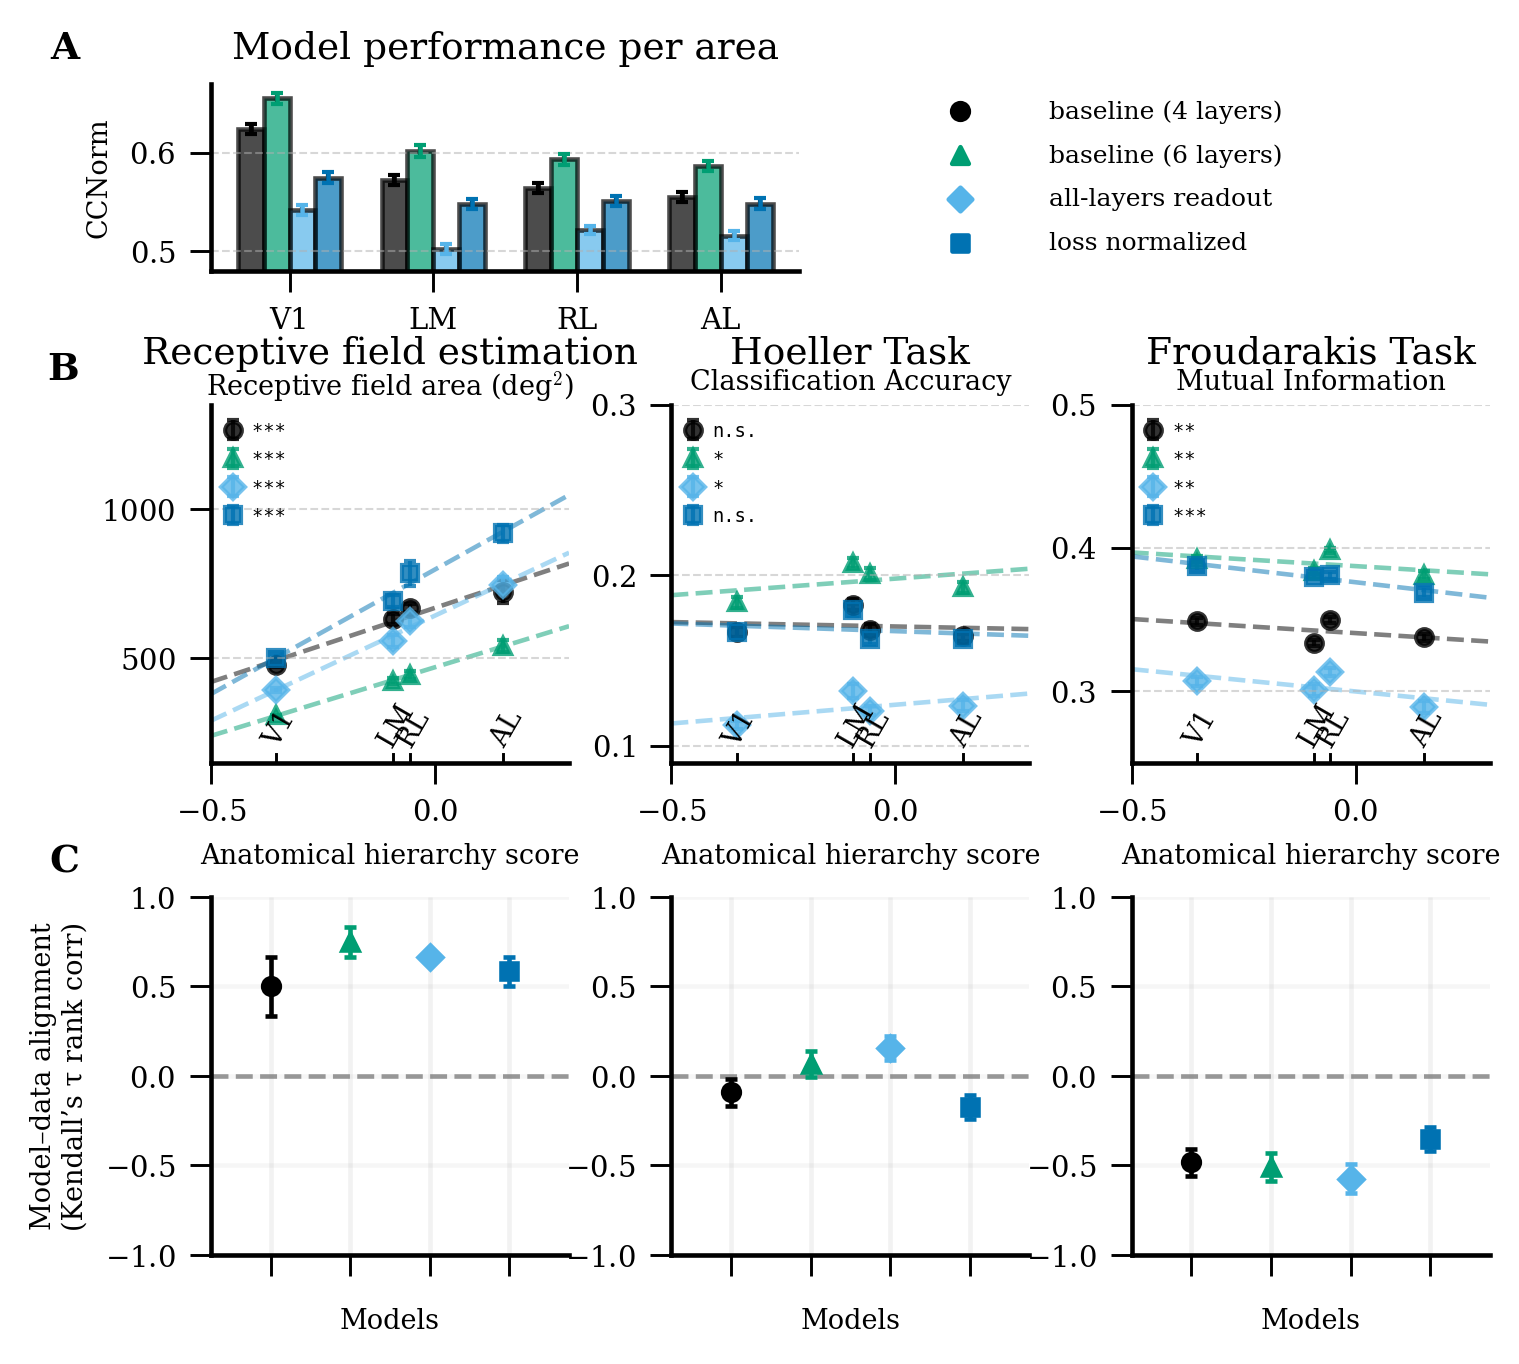

In [18]:
plot_name = "Fig2.png"
# savepath = "./figures"
path = os.path.join(savepath, plot_name)
model_order = [
    'baseline (4 layers)',
    'baseline (6 layers)' ,
    'all-layers readout', 
    'loss normalized', 
]


fig, ax_dict = build_summary_figure(
    barplot_fn = barplot_fn,
    row1_fns   = row1_fns,        # your three callable lambdas
    row2_fns   = row2_fns,        # your three callable lambdas
    figsize    = (5.5, 5.5),        # overall figure size
    wspace     = 0.8,          # spacing between columns
    hspace     = 0.45,          # spacing between rows
    model_ids  = model_order,  # ← new argument
)
fig.savefig(path, dpi=300, bbox_inches='tight') 
plt.show()


# Figure 3

## Data

In [19]:
selected_models_fig3 = ['baseline (6 layers)', 'baseline (8 layers)', 'hierarchical (anatomy)']
model_names_arf_fig3 = [
    'benchmark_6_all_seed228', 
    'benchmark_8_all_seed351', 
    '8layer_678_V1_LMRL_AL_all_seed42',
]
threshold_x = 16
threshold_y = 14

In [20]:
summary_selected_fig3 = load_summary(selected_models_fig3, metric='CCnorm', agg='median')

Loading benchmark_6_all_seed42 summary...


Loading benchmark_6_all_seed228 summary...
Loading benchmark_6_all_seed351 summary...
Loading benchmark_8_all_seed42 summary...
Loading benchmark_8_all_seed228 summary...
Loading benchmark_8_all_seed351 summary...
Loading 8layer_678_V1_LMRL_AL_all_seed42 summary...
Loading 8layer_678_V1_LMRL_AL_all_seed228 summary...
Loading 8layer_678_V1_LMRL_AL_all_seed351 summary...


In [21]:
models_receptive_fields_fig3, labels_fig3, means_rf_fig3, sems_rf_fig3 = evaluate_models_receptive_fields(
    model_names_arf_fig3,
    CORRECT_ORDERING_ARF,
    threshold_x=threshold_x,
    threshold_y=threshold_y
)

Processing benchmark_6_all_seed228...
Processing benchmark_8_all_seed351...
Processing 8layer_678_V1_LMRL_AL_all_seed42...


In [22]:
hoeller_data_fig3 = load_hoeller(selected_models_fig3)
holler_metrics_fig3 = gather_area_mean_accuracy_hoeller(hoeller_data_fig3)
x_labels_fig3, means_hoeller_fig3, sems_hoeller_fig3= compute_hoeller_kendalls(
    hoeller_data_fig3,
    CORRECT_ORDERING_HOELLER,
    use_sem=False
)

In [23]:
froudarakis_data_fig3 = load_froudarakis(selected_models_fig3)
froud_metrics_fig3 = gather_area_metric_values(
    froudarakis_data_fig3,
    metric='test_mi'
)
x_labels_fig3, means_froud_fig3, sems_froud_fig3 = compute_froudarakis_kendalls(
    froudarakis_data_fig3,
    CORRECT_ORDERING_FROUDARAKIS,
    metric='test_mi',
    use_sem=False
)


## Figure

In [24]:
barplot_fn = lambda ax: plot_grouped_dotplot_model_area_with_sems(
        summary_selected_fig3,
        ylabel='CCNorm',
        area_order=['V1','LM','RL','AL'],
        sems=True,
        title="Model performance per area",
        ylim=(0.48, 0.68),
        ax=ax,                              # ←──── important!
    )

row1_fns = [
    lambda ax: plot_median_area_per_model(
            models_receptive_fields_fig3,
            ax=ax,
            area_order=['V1', 'LM', 'RL', 'AL'],
            regline=True,
            ylim=(150, 1350), xlim=(-0.5, 0.3),
            ylabel="Receptive field area (deg$^2$)",
            xlabel="Anatomical hierarchy score",
            loc='upper left',
            title="Receptive field estimation",
            legend=True, 
            # yticks=[250, 500, 750, 1000, 1250],
        ),
    lambda ax: plot_single_neuron_perf_per_model_with_sems(
        holler_metrics_fig3,
        ylabel='Classification Accuracy',
        ax=ax,
        area_order=['V1','LM','RL','AL'],
        sems=True, regline=True,
        ylim=(0.09,0.3), xlim=(-0.5,0.3),
        xlabel='Anatomical hierarchy score',
        title='Hoeller Task',
        legend=True, loc='upper left',
        # bbox_to_anchor=(1, 1),
    ),
    lambda ax: plot_single_neuron_perf_per_model_with_sems(
        froud_metrics_fig3,
        ylabel='Mutual Information',
        ax=ax,
        area_order=['V1','LM','RL','AL'],
        sems=True, regline=True,
        ylim=(0.25, 0.5), xlim=(-0.5,0.3),
        xlabel='Anatomical hierarchy score',
        title='Froudarakis Task',
        legend=True, loc='upper left',
        # bbox_to_anchor=(1, 1),
    ),
]

row2_fns   = [
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_fig3, means_rf_fig3, sems_rf_fig3,
            ylabel="Model–data alignment\n(Kendall’s τ rank corr)",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_fig3, means_hoeller_fig3, sems_hoeller_fig3,
            ylabel="",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_fig3, means_froud_fig3, sems_froud_fig3,
            ylabel="",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
    ]

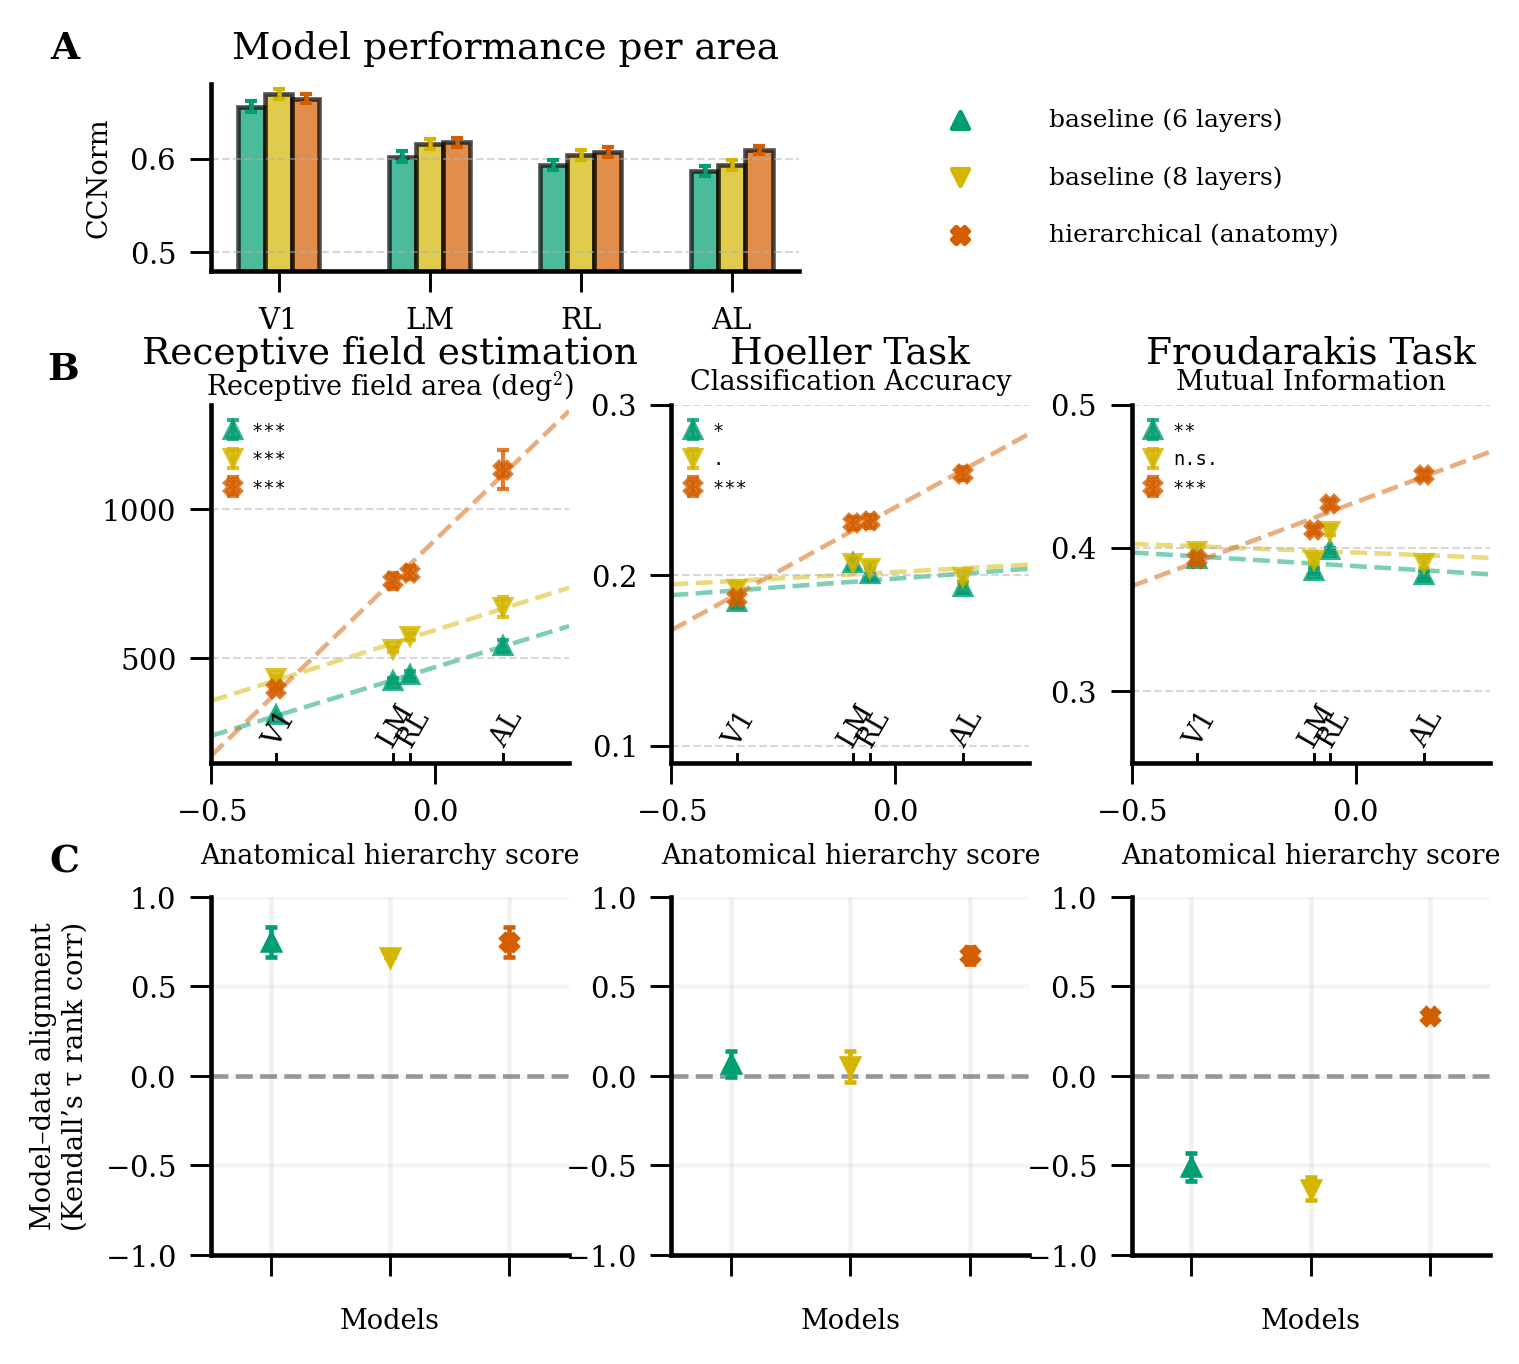

In [25]:
model_order_fig3 = [
    'baseline (6 layers)',
    'baseline (8 layers)',
    'hierarchical (anatomy)',
]
plot_name = "Fig3.png"
path = os.path.join(savepath, plot_name)
fig, ax_dict = build_summary_figure(
    barplot_fn = barplot_fn,
    row1_fns   = row1_fns,        # your three callable lambdas
    row2_fns   = row2_fns,        # your three callable lambdas
    figsize    = (5.5, 5.5),        # overall figure size
    wspace     = 0.8,          # spacing between columns
    hspace     = 0.45,          # spacing between rows
    model_ids  = model_order_fig3,  # ← new argument
)
fig.savefig(path, dpi=300, bbox_inches="tight")
plt.show()


# Figure 4

## Data

In [ ]:
from demo.figures.utils import evaluate_model_name_vs_true_ranking
from demo.figures.fig_params import MODEL_RANKINGS, MODEL_MAPPINGS

In [27]:
selected_models_fig4 = [
    'hierarchical (anatomy)',
    'hierarchical (V1-AL-LM/RL)',
    'hierarchical (LM/RL-AL-V1)',
    'hierarchical (LM/RL-V1-AL)',
    'hierarchical (AL-LM/RL-V1)',
    'hierarchical (AL-V1-LM/RL)',
]
model_names_arf_fig4 = [ 
    '8layer_678_V1_LMRL_AL_all_seed42',
    '8layer_678_V1_AL_LMRL_all_seed228',
    '8layer_678_LMRL_V1_AL_all_seed351',
    '8layer_678_LMRL_AL_V1_all_seed351',
    '8layer_678_AL_LMRL_V1_all_seed228',
    '8layer_678_AL_V1_LMRL_all_seed351',
]
correct_ordering = {'V1': 1, 'RL': 2, 'LM': 2, 'AL': 3}
model_name_taus = evaluate_model_name_vs_true_ranking(
    MODEL_RANKINGS,
    correct_ordering
)

In [28]:
x_values_rf_fig4 = [model_name_taus[MODEL_MAPPINGS[label]] for label in model_names_arf_fig4]

In [29]:
models_receptive_fields_fig4, x_labels_rf_fig4, means_rf_fig4, sems_rf_fig4 = evaluate_models_receptive_fields(
    model_names_arf_fig4,
    CORRECT_ORDERING_ARF,
    threshold_x=threshold_x,
    threshold_y=threshold_y,
    return_mean=False
)

Processing 8layer_678_V1_LMRL_AL_all_seed42...
Processing 8layer_678_V1_AL_LMRL_all_seed228...
Processing 8layer_678_LMRL_V1_AL_all_seed351...
Processing 8layer_678_LMRL_AL_V1_all_seed351...
Processing 8layer_678_AL_LMRL_V1_all_seed228...
Processing 8layer_678_AL_V1_LMRL_all_seed351...


In [30]:
hoeller_data_fig4 = load_hoeller(selected_models_fig4)
x_labels_hol_fig4, means_hol_fig4, sems_hol_fig4 = compute_hoeller_kendalls(
    hoeller_data_fig4,
    CORRECT_ORDERING_HOELLER,
    use_sem=False,
    return_mean=False
)
x_values_hol_fig4 = [model_name_taus[label] for label in x_labels_hol_fig4]


In [31]:
froudarakis_data_fig4 = load_froudarakis(selected_models_fig4)
x_labels_fro_fig4, means_fro_fig4, sems_fro_fig4 = compute_froudarakis_kendalls(
    froudarakis_data_fig4,
    CORRECT_ORDERING_FROUDARAKIS,
    metric='test_mi',
    use_sem=False,
    return_mean=False
)
x_values_fro_fig4 = [model_name_taus[label] for label in x_labels_fro_fig4]

## Figure

In [ ]:
from demo.figures.fig_functions import scatter_name_vs_model_tau_with_sem, build_summary_figure

In [33]:
single_row_fns = [
    lambda ax: scatter_name_vs_model_tau_with_sem(
            x_labels_rf_fig4,
            x_values_rf_fig4,
            means_rf_fig4,
            sems_rf_fig4,
            ylabel="Model–data alignment\n(Kendall’s τ rank corr)",
            xlabel="",
            title="Receptive field estimation",
            ylim=(-1, 1),
            regline=True,
            ax=ax,
        ),
    lambda ax: scatter_name_vs_model_tau_with_sem(
        x_labels_hol_fig4,
        x_values_hol_fig4,
        means_hol_fig4,
        sems_hol_fig4,
        ylabel="",
        xlabel="Architecture–anatomy alignment (Kendall’s τ rank corr)",
        title="Hoeller Task",
        ylim=(-1, 1),
        regline=True,
        ax=ax,
    ),
    lambda ax: scatter_name_vs_model_tau_with_sem(
        x_labels_fro_fig4,
        x_values_fro_fig4,
        means_fro_fig4,
        sems_fro_fig4,
        ylabel="",
        xlabel="",
        title="Froudarakis Task",
        ylim=(-1, 1),
        regline=True,
        ax=ax,
        legend=True,
    ),
]



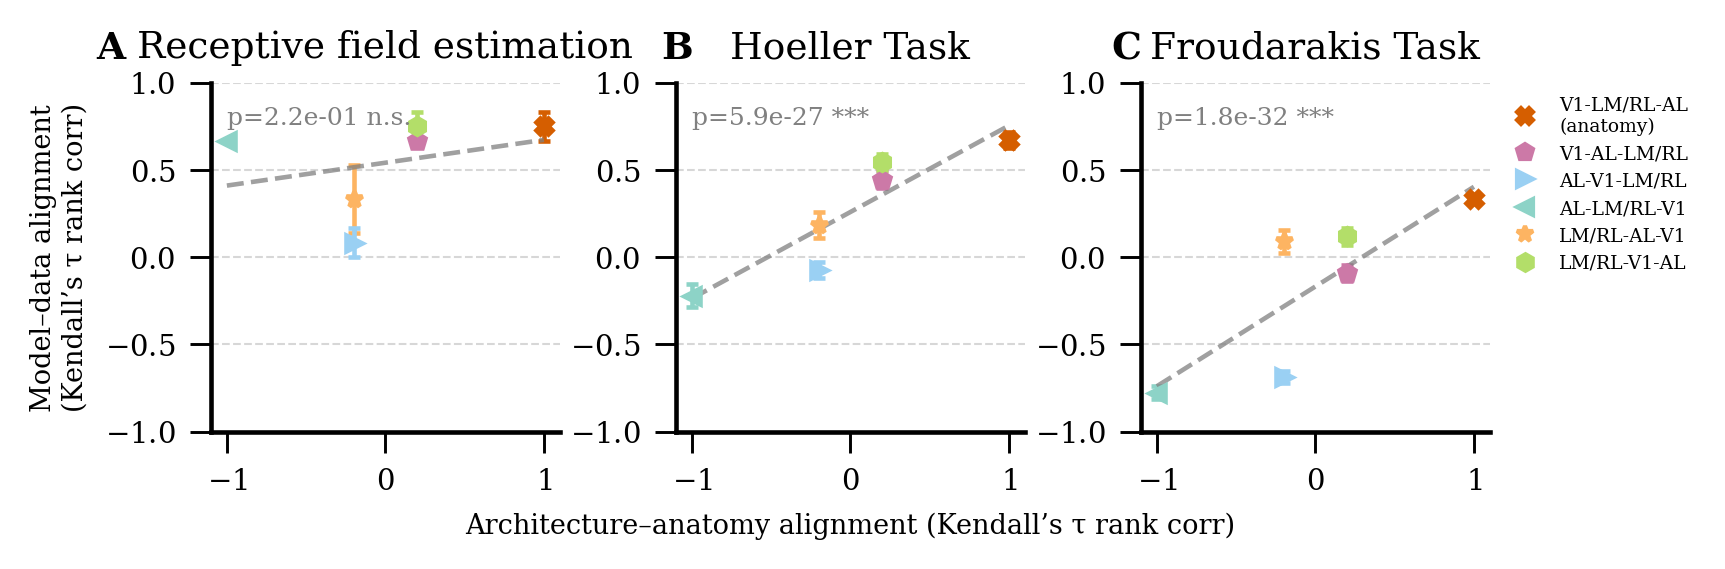

In [34]:
plot_name = "Fig4.png"
path = os.path.join(savepath, plot_name)
fig, ax_dict = build_summary_figure(
    barplot_fn = None,
    row1_fns   = None,        # your three callable lambdas
    row2_fns   = None,        # your three callable lambdas
    single_row_fns = single_row_fns,
    figsize    = (5.5, 4),        # overall figure size
    wspace     = 1,          # spacing between columns
    hspace     = 0.15,          # spacing between rows
    model_ids  = None,  
)
fig.savefig(path, dpi=300, bbox_inches="tight")
plt.show()

# Supplementary

## S1

### Data

In [ ]:
from demo.figures.fig_functions import plot_receptive_field
from demo.figures.utils import filter_arf
import pickle
import os

In [36]:
model_name = '8layer_678_V1_LMRL_AL_all_seed42'
path_arf = os.path.join('save', 'results', f'{model_name}', 'aRF.pkl')
with open(path_arf, 'rb') as f:
    arf_data = pickle.load(f)
    
path_summary = os.path.join('save', 'results', f'{model_name}', 'summary.pkl')
with open(path_summary, 'rb') as f:
    summary_data = pickle.load(f)


In [37]:
threshold_x = 16
threshold_y = 14
low_pass_arf_filtered, low_pass_params_filtered = filter_arf(
    arf_data, 
    summary_data, 
    threshold=0.35, 
    sigma_percentile=95,
    threshold_sigma_x=threshold_x,
    threshold_sigma_y=threshold_y
)

### Figure

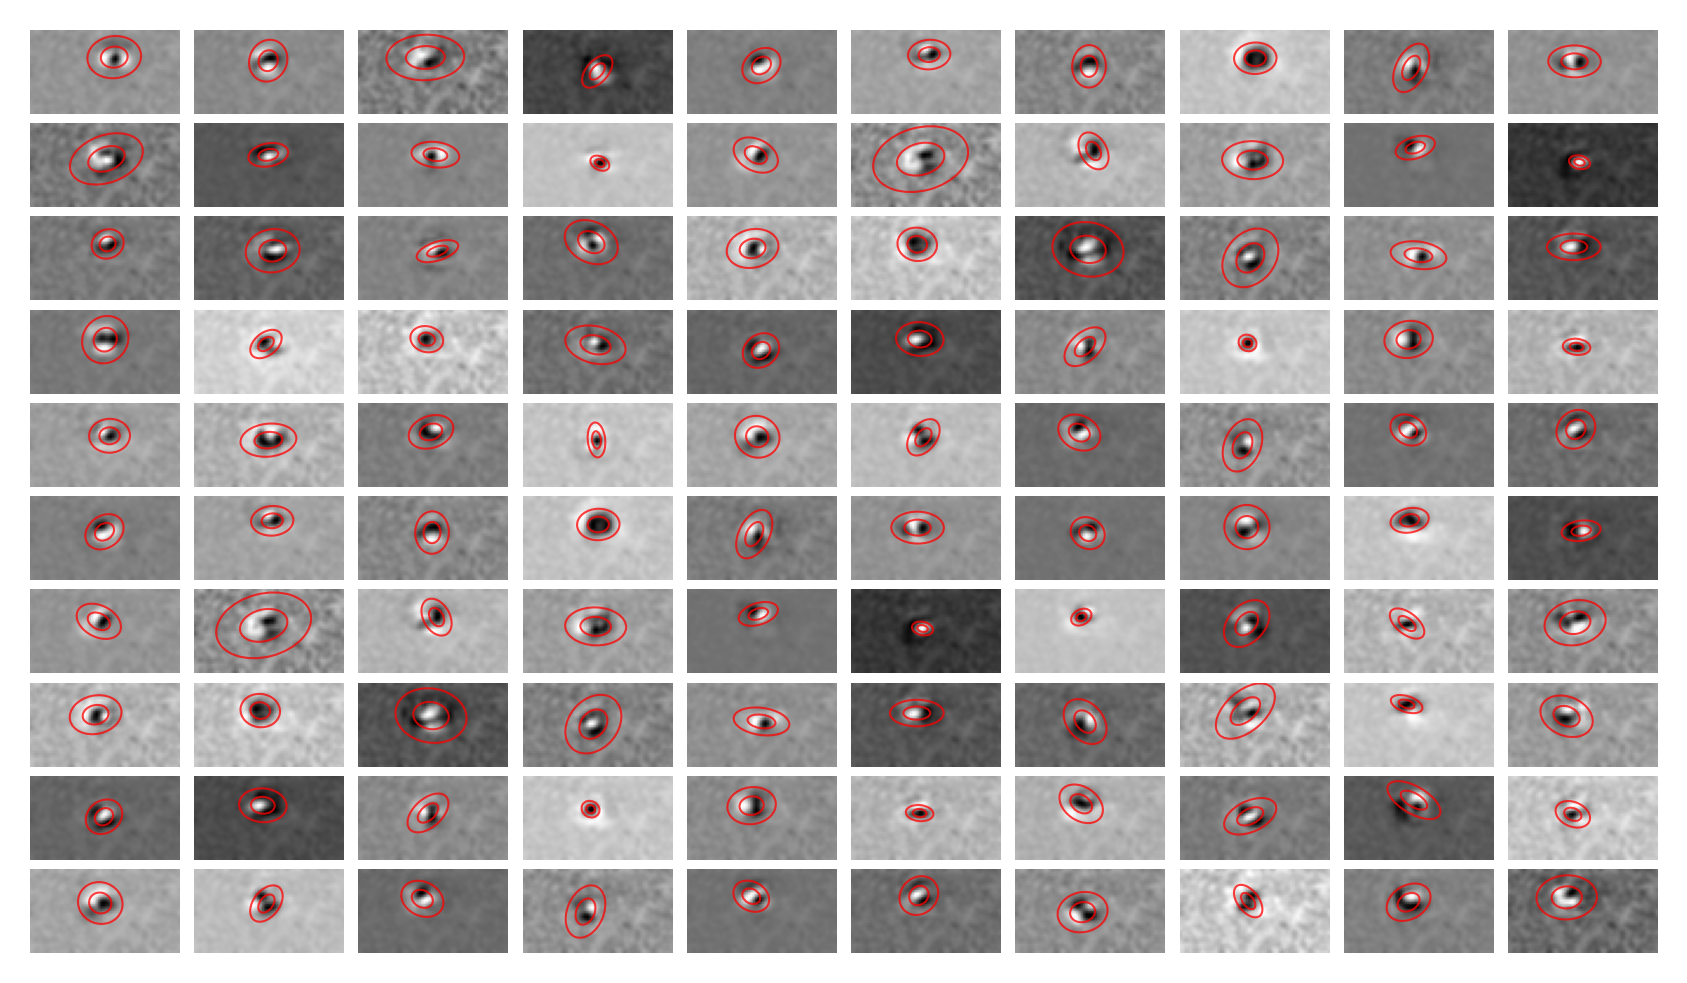

In [38]:
figsize=(7, 4)
path = os.path.join(savepath, 'FigS1.png')

plot_receptive_field(
    low_pass_arf_filtered,
    low_pass_params_filtered,
    'V1', 
    figsize=figsize, 
    session='6_4', 
    rows=10, 
    cols=10,
    k=4, 
    savepath=path
)

## S2

In [39]:
from demo.figures.utils import evaluate_model_name_vs_true_ranking
from demo.figures.fig_params import MODEL_RANKINGS
from demo.figures.fig_functions import build_single_figure, plot_metric_vs_models_tau

In [40]:
selected_models_S1 = [
    'hierarchical (anatomy)',
    'hierarchical (V1-AL-LM/RL)',
    'hierarchical (LM/RL-AL-V1)',
    'hierarchical (LM/RL-V1-AL)',
    'hierarchical (AL-LM/RL-V1)',
    'hierarchical (AL-V1-LM/RL)',
]
correct_ordering = {'V1': 1, 'RL': 2, 'LM': 2, 'AL': 3}


In [41]:
model_name_taus = evaluate_model_name_vs_true_ranking(
    MODEL_RANKINGS,
    correct_ordering
)

In [42]:
summary_selected_S1 = load_summary(selected_models_S1, metric='CCnorm', agg='median')

Loading 8layer_678_V1_LMRL_AL_all_seed42 summary...


Loading 8layer_678_V1_LMRL_AL_all_seed228 summary...
Loading 8layer_678_V1_LMRL_AL_all_seed351 summary...
Loading 8layer_678_V1_AL_LMRL_all_seed42 summary...
Loading 8layer_678_V1_AL_LMRL_all_seed228 summary...
Loading 8layer_678_V1_AL_LMRL_all_seed351 summary...
Loading 8layer_678_AL_V1_LMRL_all_seed42 summary...
Loading 8layer_678_AL_V1_LMRL_all_seed228 summary...
Loading 8layer_678_AL_V1_LMRL_all_seed351 summary...
Loading 8layer_678_AL_LMRL_V1_all_seed42 summary...
Loading 8layer_678_AL_LMRL_V1_all_seed228 summary...
Loading 8layer_678_AL_LMRL_V1_all_seed351 summary...
Loading 8layer_678_LMRL_AL_V1_all_seed42 summary...
Loading 8layer_678_LMRL_AL_V1_all_seed228 summary...
Loading 8layer_678_LMRL_AL_V1_all_seed351 summary...
Loading 8layer_678_LMRL_V1_AL_all_seed42 summary...
Loading 8layer_678_LMRL_V1_AL_all_seed228 summary...
Loading 8layer_678_LMRL_V1_AL_all_seed351 summary...


In [43]:
summary_selected_S1.keys()

dict_keys(['hierarchical (anatomy)', 'hierarchical (V1-AL-LM/RL)', 'hierarchical (AL-V1-LM/RL)', 'hierarchical (AL-LM/RL-V1)', 'hierarchical (LM/RL-AL-V1)', 'hierarchical (LM/RL-V1-AL)'])

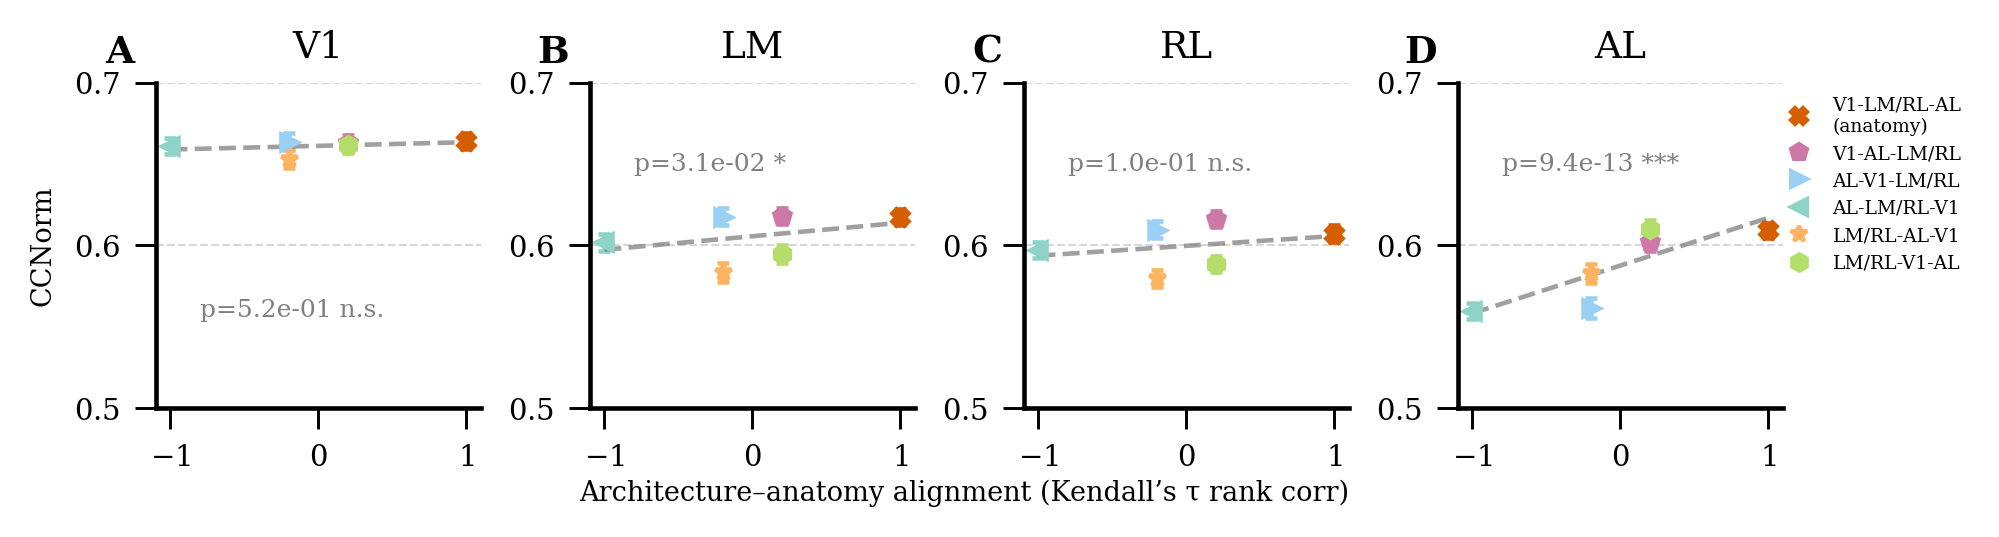

In [44]:
ylim=(0.5, 0.7)
fig, ax_dict = build_single_figure(
    barplot_fn=None,
    row1_fns=None,
    row2_fns=None,
    model_ids=None,
    single_row_fns=[
        lambda ax: plot_metric_vs_models_tau(
            summary_selected_S1,
            model_name_taus,
            ylabel="CCNorm",
            xlabel="",
            loc='upper right', 
            selected_area="V1", 
            legend=False,
            ylim=ylim,
            text_pos=(-0.8, 0.56),
            title="V1",
            ax=ax
        ),
        lambda ax: plot_metric_vs_models_tau(
            summary_selected_S1,
            model_name_taus,
            ylabel="",
            xlabel="Architecture–anatomy alignment (Kendall’s τ rank corr)",
            loc='upper right',
            selected_area="LM", 
            legend=False,
            ylim=ylim,
            text_pos=(-0.8, 0.65),
            title="LM",
            ax=ax
        ),
        lambda ax: plot_metric_vs_models_tau(
            summary_selected_S1,
            model_name_taus,
            ylabel="",
            xlabel="",
            loc='upper right',
            selected_area="RL", 
            legend=False,
            ylim=ylim,
            text_pos=(-0.8, 0.65),
            title="RL",
            ax=ax
        ),
        lambda ax: plot_metric_vs_models_tau(
            summary_selected_S1,
            model_name_taus,
            ylabel="",
            xlabel="",
            loc='upper right',
            selected_area="AL", 
            legend=True,
            bbox_to_anchor=(1.6, 1.01),
            ylim=ylim,
            text_pos=(-0.8, 0.65),
            title="AL",
            ax=ax
        ),
    ],
    figsize=(7.0, 2.2),
    wspace=1,
    hspace=0.45,
)
plt.show()
path = os.path.join(savepath, "FigS2.png")
fig.savefig(path, dpi=300, bbox_inches="tight")

## S3

In [45]:
selected_models_S3 = ['hierarchical (anatomy)', 'hierarchical (two streams)', 'hierarchical (9 layer)', 'Wang (2025)']
model_names_arf_S3 = [
    '8layer_678_V1_LMRL_AL_all_seed42',
    'two_streams_67_678_V1LM_V1RLAL_all_seed351',
    '9layer_6789_V1_LM_RL_AL_all_seed228',
    'towards_wang',
]

threshold_x = 16
threshold_y = 14

In [46]:
summary_selected_S3 = load_summary(selected_models_S3, metric='CCnorm', agg='median')


Loading 8layer_678_V1_LMRL_AL_all_seed42 summary...
Loading 8layer_678_V1_LMRL_AL_all_seed228 summary...
Loading 8layer_678_V1_LMRL_AL_all_seed351 summary...
Loading two_streams_67_678_V1LM_V1RLAL_all_seed42 summary...
Loading two_streams_67_678_V1LM_V1RLAL_all_seed228 summary...
Loading two_streams_67_678_V1LM_V1RLAL_all_seed351 summary...
Loading 9layer_6789_V1_LM_RL_AL_all_seed42 summary...
Loading 9layer_6789_V1_LM_RL_AL_all_seed228 summary...
Loading 9layer_6789_V1_LM_RL_AL_all_seed351 summary...
Loading towards_wang_behavior summary...


In [47]:
models_receptive_fields_S3, labels_S3, means_rf_S3, sems_rf_S3 = evaluate_models_receptive_fields(
    model_names_arf_S3,
    CORRECT_ORDERING_ARF,
    threshold_x=threshold_x,
    threshold_y=threshold_y
)


Processing 8layer_678_V1_LMRL_AL_all_seed42...
Processing two_streams_67_678_V1LM_V1RLAL_all_seed351...
Processing 9layer_6789_V1_LM_RL_AL_all_seed228...
Processing towards_wang...


In [48]:
hoeller_data_S3 = load_hoeller(selected_models_S3)
holler_metrics_S3 = gather_area_mean_accuracy_hoeller(hoeller_data_S3)
x_labels_S3, means_hoeller_S3, sems_hoeller_S3= compute_hoeller_kendalls(
    hoeller_data_S3,
    CORRECT_ORDERING_HOELLER,
    use_sem=False
)


In [49]:
froudarakis_data_S3 = load_froudarakis(selected_models_S3)
froud_metrics_S3 = gather_area_metric_values(
    froudarakis_data_S3,
    metric='test_mi'
)
x_labels_S3, means_froud_S3, sems_froud_S3 = compute_froudarakis_kendalls(
    froudarakis_data_S3,
    CORRECT_ORDERING_FROUDARAKIS,
    metric='test_mi',
    use_sem=False
)

In [50]:
## Figure
barplot_fn = lambda ax: plot_grouped_dotplot_model_area_with_sems(
        summary_selected_S3,
        ylabel='CCNorm',
        area_order=['V1','LM','RL','AL'],
        sems=True,
        title="Model performance per area",
        ylim=(0.48, 0.68),
        ax=ax,                              # ←──── important!
    )

row1_fns = [
    lambda ax: plot_median_area_per_model(
            models_receptive_fields_S3,
            ax=ax,
            area_order=['V1', 'LM', 'RL', 'AL'],
            regline=True,
            ylim=(150, 1350), xlim=(-0.5, 0.3),
            ylabel="Receptive field area (deg$^2$)",
            xlabel="Anatomical hierarchy score",
            loc='upper left',
            title="Receptive field estimation",
            legend=True, 
            # yticks=[250, 500, 750, 1000, 1250],
        ),
    lambda ax: plot_single_neuron_perf_per_model_with_sems(
        holler_metrics_S3,
        ylabel='Classification Accuracy',
        ax=ax,
        area_order=['V1','LM','RL','AL'],
        sems=True, regline=True,
        ylim=(0.09,0.3), xlim=(-0.5,0.3),
        xlabel='Anatomical hierarchy score',
        title='Hoeller Task',
        legend=True, loc='upper left',
        # bbox_to_anchor=(1, 0.13),
    ),
    lambda ax: plot_single_neuron_perf_per_model_with_sems(
        froud_metrics_S3,
        ylabel='Mutual Information',
        ax=ax,
        area_order=['V1','LM','RL','AL'],
        sems=True, regline=True,
        ylim=(0.25, 0.5), xlim=(-0.5,0.3),
        xlabel='Anatomical hierarchy score',
        title='Froudarakis Task',
        legend=True, loc='upper left',
        # bbox_to_anchor=(1, 0.13),
    ),
]

row2_fns   = [
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_S3, means_rf_S3, sems_rf_S3,
            ylabel="Model–data alignment\n(Kendall’s τ rank corr)",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_S3, means_hoeller_S3, sems_hoeller_S3,
            ylabel="",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
        lambda ax: dotplot_name_vs_model_tau_with_sem(
            x_labels_S3, means_froud_S3, sems_froud_S3,
            ylabel="",
            xlabel="Models",
            ax=ax,
            ylim=(-1, 1), yticks=[-1, -0.5, 0, 0.5, 1],
        ),
    ]


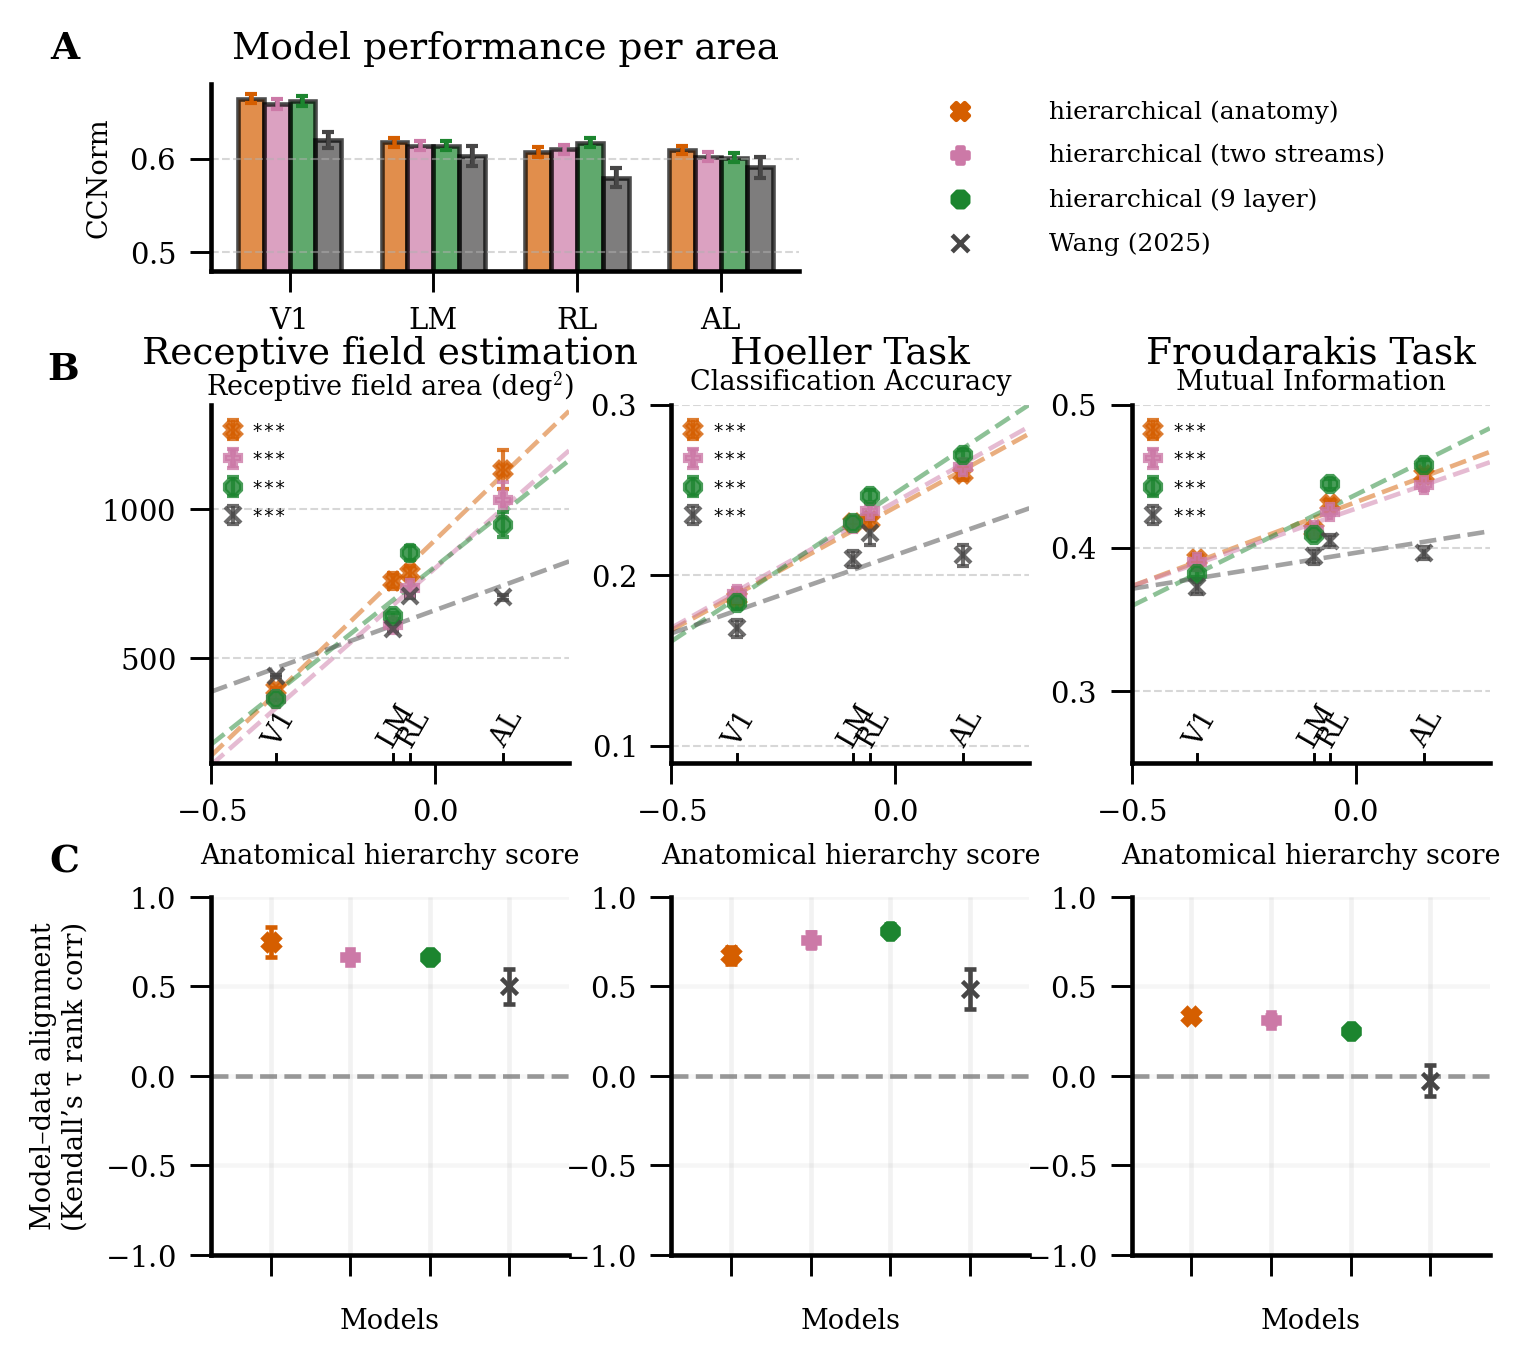

In [51]:
model_order = [
    'hierarchical (anatomy)',
    'hierarchical (two streams)',
    'hierarchical (9 layer)',
    'Wang (2025)',
]
plot_name = "FigS3.png"
path = os.path.join(savepath, plot_name)
fig, ax_dict = build_summary_figure(
    barplot_fn = barplot_fn,
    row1_fns   = row1_fns,        # your three callable lambdas
    row2_fns   = row2_fns,        # your three callable lambdas
    figsize    = (5.5, 5.5),        # overall figure size
    wspace     = 0.8,          # spacing between columns
    hspace     = 0.45,          # spacing between rows
    model_ids  = model_order,  # ← new argument
)
fig.savefig(path, dpi=300, bbox_inches="tight")
plt.show()
